In [1]:
# Some final variables
image_size = 299
batch_size = 128
is_debug = False
train_folder = "sub_train/" if is_debug else "train/"
cat_count = 50 if is_debug else 12500
dog_count = 50 if is_debug else 12500
best_model_path_1 = 'best_point_1.h5'
best_model_path_2 = 'best_point_2.h5'

In [2]:
def get_train_files():
    train_files = []
    for i in range(cat_count):
        train_files.append(train_folder + "cat." + str(i) + ".jpg")
        
    for i in range(dog_count):
        train_files.append(train_folder + "dog." + str(i) + ".jpg")
        
    return train_files

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg

train_files = get_train_files()
train_files = sorted(train_files, key=lambda s: (len(s), s))

xs = []
ys = []
for i in range(len(train_files)):
    f = train_files[i]
    im = Image.open(f)
    width, height = im.size
    if (width > 600 or height > 600):
        img = mpimg.imread(f)
        plt.imshow(img)
        plt.show()
        print(f)
    xs.append(width)
    ys.append(height)
x_array = np.array(xs)
y_array = np.array(ys)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


<Figure size 640x480 with 1 Axes>

train/cat.835.jpg


<Figure size 640x480 with 1 Axes>

train/dog.2317.jpg


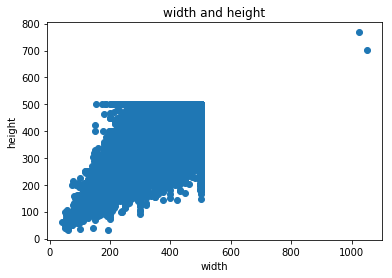

In [4]:
plt.title('width and height')
plt.xlabel('width')
plt.ylabel('height')
plt.scatter(x_array, y_array)
plt.show()


In [5]:
from keras.applications.inception_v3 import InceptionV3

inceptionV3 = InceptionV3(weights='imagenet')  # 引入InceptionV3模型

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input, decode_predictions

def readImage(path):
    img = image.load_img(path, target_size=(image_size, image_size))
    x = image.img_to_array(img)
    
#     x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
#     x = x.astype('float32')
#     x /= 255.0
    return x

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
def getLabel(path):
    name = path[path.rfind('/') + 1:path.index('.')]
#     print (name)
    return 1 if name == 'dog' else 0

In [8]:
dogs = [
 'n02085620','n02085782','n02085936','n02086079'
,'n02086240','n02086646','n02086910','n02087046'
,'n02087394','n02088094','n02088238','n02088364'
,'n02088466','n02088632','n02089078','n02089867'
,'n02089973','n02090379','n02090622','n02090721'
,'n02091032','n02091134','n02091244','n02091467'
,'n02091635','n02091831','n02092002','n02092339'
,'n02093256','n02093428','n02093647','n02093754'
,'n02093859','n02093991','n02094114','n02094258'
,'n02094433','n02095314','n02095570','n02095889'
,'n02096051','n02096177','n02096294','n02096437'
,'n02096585','n02097047','n02097130','n02097209'
,'n02097298','n02097474','n02097658','n02098105'
,'n02098286','n02098413','n02099267','n02099429'
,'n02099601','n02099712','n02099849','n02100236'
,'n02100583','n02100735','n02100877','n02101006'
,'n02101388','n02101556','n02102040','n02102177'
,'n02102318','n02102480','n02102973','n02104029'
,'n02104365','n02105056','n02105162','n02105251'
,'n02105412','n02105505','n02105641','n02105855'
,'n02106030','n02106166','n02106382','n02106550'
,'n02106662','n02107142','n02107312','n02107574'
,'n02107683','n02107908','n02108000','n02108089'
,'n02108422','n02108551','n02108915','n02109047'
,'n02109525','n02109961','n02110063','n02110185'
,'n02110341','n02110627','n02110806','n02110958'
,'n02111129','n02111277','n02111500','n02111889'
,'n02112018','n02112137','n02112350','n02112706'
,'n02113023','n02113186','n02113624','n02113712'
,'n02113799','n02113978']

cats=[
'n02123045','n02123159','n02123394','n02123597'
,'n02124075','n02125311','n02127052']

def isCat(preds): # 判断是否为猫
    for item in preds:
        if item[0] in cats:
            return True
    return False
def isDog(preds): # 判断是否为狗
    for item in preds:
        if item[0] in dogs:
            return True
    return False
def isValid(img_path): # 判断是否为合理的图片
    label = getLabel(img_path)
    preds = getPreds(img_path)
    return {
        0:isCat(preds),
        1:isDog(preds)
    }[label]


# (x_train, y_train), (x_test, y_test) = cifar10.load_data()
# y_train = np_utils.to_categorical(y_train, num_classes)
# y_test = np_utils.to_categorical(y_test, num_classes)

In [6]:
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np

def getPreds(img_path): # 获取模型对某一张图片的预测top-50
    img = image.load_img(img_path, target_size=(image_size, image_size))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = inceptionV3.predict(x)
    result = decode_predictions(preds, top=50)[0]
#     print('Predicted:', result)
    return result

In [7]:
import os

valid_files_save_to = 'valid_files'
valid_files_read_from = valid_files_save_to + '.npy'
if (os.path.exists(valid_files_read_from)):
    valid_files = np.load(valid_files_read_from)
else:
    # Preprocess pics
    # import helper

    valid_files = []
    invalid_files = []
    train_files = get_train_files()
    train_files = sorted(train_files, key=lambda s: (len(s), s))

    count = len(train_files)

    print(str(count) + " need to preprocess")
    for i in range(count):
        file = train_files[i]

        print (file, end='\r')
        if isValid(file):
            valid_files.append(file)
        else:
    #         os.remove(file)
            invalid_files.append(file)
    valid_files = np.array(valid_files)
    np.save(valid_files_save_to, valid_files)

    print (str(count) + " files valid\n")
    print (str(len(invalid_files)) + " invalid files as below:\n", end='\r')
    print (invalid_files)

In [8]:
def readFeatureAndLabel(valid_files):
    file_count = len(valid_files)
    print("readFeatureAndLabel file_count=" + str(file_count))
    train_feature = []
    train_label = []
    for i in range(file_count):
        f = train_files[i]
#         print (f)
        train_feature.append(readImage(f))
        train_label.append(getLabel(f))
    
    return train_feature, train_label

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split

total_feature, total_label = readFeatureAndLabel(valid_files)
total_feature = np.array(total_feature)

total_label = np.array(total_label)

train_feature, validation_feature, train_label, validation_label = train_test_split(total_feature, total_label, test_size=0.1, random_state=1)
print('done')

readFeatureAndLabel file_count=24922
done


In [13]:
# Plan C

from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras import backend as K
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint

# 创建预训练模型
base_model = InceptionV3(weights='imagenet', include_top=False)

# 添加平均池化层
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
# 由于我们只需要狗的概率，所以设置参数classes为1，输出函数为sigmoid
predictions = Dense(1, activation='sigmoid')(x)

# 创建模型
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
# optimizer='rmsprop'
# , beta_1=0.9, beta_2=0.999, epsilon=1e-08
opt = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# train the model on the new data for a few epochs
# history = model.fit_generator(train_gen, epochs=10, validation_data=val_gen)
# callback1 = ModelCheckpoint(best_model_path_1, monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# callbacks=[callback1],
history = model.fit(train_feature, train_label, batch_size=batch_size, epochs=15,  validation_data=(validation_feature, validation_label))

Train on 22429 samples, validate on 2493 samples
Epoch 1/15
22429/22429 [==============================] - 76s 3ms/step - loss: 0.5380 - acc: 0.7448 - val_loss: 0.3061 - val_acc: 0.9378
Epoch 2/15
22429/22429 [==============================] - 68s 3ms/step - loss: 0.3382 - acc: 0.9041 - val_loss: 0.1975 - val_acc: 0.9643
Epoch 3/15
22429/22429 [==============================] - 67s 3ms/step - loss: 0.2542 - acc: 0.9344 - val_loss: 0.1689 - val_acc: 0.9579
Epoch 4/15
22429/22429 [==============================] - 67s 3ms/step - loss: 0.2072 - acc: 0.9466 - val_loss: 0.1381 - val_acc: 0.9667
Epoch 5/15
22429/22429 [==============================] - 68s 3ms/step - loss: 0.1792 - acc: 0.9528 - val_loss: 0.1163 - val_acc: 0.9695
Epoch 6/15
22429/22429 [==============================] - 68s 3ms/step - loss: 0.1614 - acc: 0.9538 - val_loss: 0.1101 - val_acc: 0.9703
Epoch 7/15
22429/22429 [==============================] - 68s 3ms/step - loss: 0.1460 - acc: 0.9584 - val_loss: 0.1046 - val_acc:

Text(0.5,1,'Accuracy Curves')

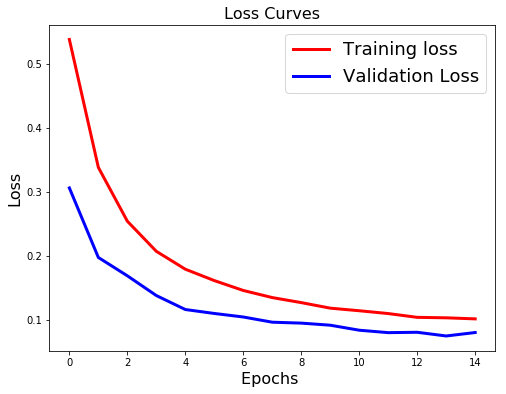

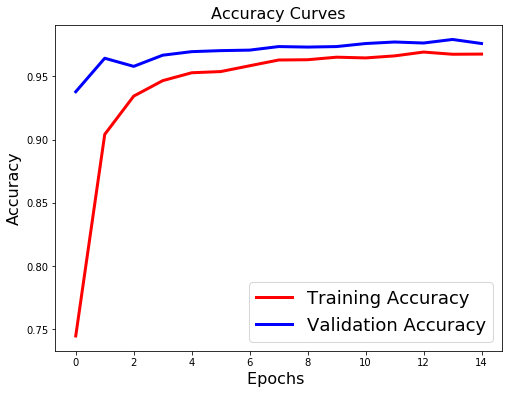

In [14]:
# show history

import matplotlib.pyplot as plt

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [15]:
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True


# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
# loss='sparse_categorical_crossentropy'
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint

from keras.models import load_model

# model2 = load_model(best_model_path_1)

# Adam(lr=0.001)
opt2 = SGD(lr=0.0008, momentum=0.99, decay=0.00002, nesterov=True)
model.compile(optimizer=opt2, loss='binary_crossentropy', metrics=['accuracy'])

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
callback2 = ModelCheckpoint(best_model_path_2, monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
history2 = model.fit(train_feature, train_label, batch_size=batch_size, epochs=10, callbacks=[callback2], validation_data=(validation_feature, validation_label), class_weight='auto')
# history2 = model.fit_generator(train_gen, epochs=10, validation_data=val_gen)

0 input_2
1 conv2d_95
2 batch_normalization_95
3 activation_95
4 conv2d_96
5 batch_normalization_96
6 activation_96
7 conv2d_97
8 batch_normalization_97
9 activation_97
10 max_pooling2d_5
11 conv2d_98
12 batch_normalization_98
13 activation_98
14 conv2d_99
15 batch_normalization_99
16 activation_99
17 max_pooling2d_6
18 conv2d_103
19 batch_normalization_103
20 activation_103
21 conv2d_101
22 conv2d_104
23 batch_normalization_101
24 batch_normalization_104
25 activation_101
26 activation_104
27 average_pooling2d_10
28 conv2d_100
29 conv2d_102
30 conv2d_105
31 conv2d_106
32 batch_normalization_100
33 batch_normalization_102
34 batch_normalization_105
35 batch_normalization_106
36 activation_100
37 activation_102
38 activation_105
39 activation_106
40 mixed0
41 conv2d_110
42 batch_normalization_110
43 activation_110
44 conv2d_108
45 conv2d_111
46 batch_normalization_108
47 batch_normalization_111
48 activation_108
49 activation_111
50 average_pooling2d_11
51 conv2d_107
52 conv2d_109
53 co

Text(0.5,1,'Accuracy Curves')

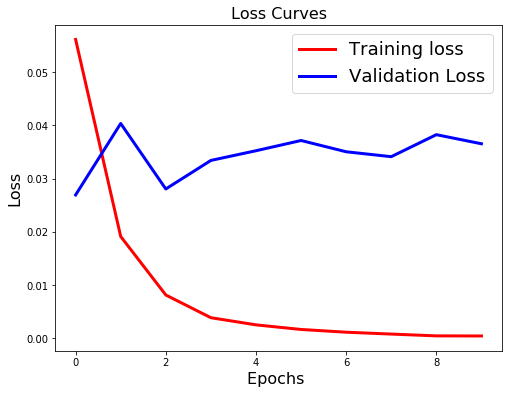

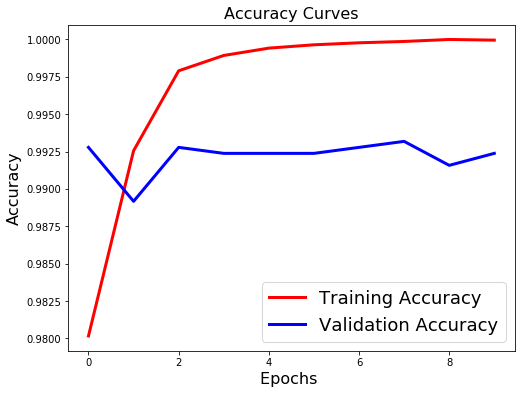

In [16]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['acc'],'r',linewidth=3.0)
plt.plot(history2.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [10]:
import math

def score_fun(label_pre):
    total_score = 0.
    size = validation_label.size
    for i in range(size):
        y = validation_label[i]
        yp = label_pre[i]
#         print (str(y) + " " + str(yp))
        try:
            total_score += y * math.log(yp) + (1 - y)*math.log(1-yp)
        except:
            print (str(i) + ": " + str(y) + " - " + str(yp))
    return -total_score/size
print("done")

done


In [11]:
from keras.models import load_model

model_pre = load_model(best_model_path_2)

In [12]:
val_label_pre = model_pre.predict(validation_feature)
val_label_pre = np.clip(val_label_pre, 0.01, 0.99)
score = score_fun(val_label_pre)
print (score)

0.03445764780210058


In [4]:
# Predict for test data

import helper
import numpy as np

test_files = helper.get_test_files()
test_files = sorted(test_files, key=lambda s: (len(s), s))

test_file_size = len(test_files)

test_feature = []
for i in range(test_file_size):
    test_feature.append(readImage(test_files[i]))
test_feature = np.asarray(test_feature)
print(type(test_feature))
test_label = model_pre.predict(test_feature, batch_size=batch_size)
print (len(test_label))

<class 'numpy.ndarray'>
12500


In [ ]:
# Write out predict data to csv

test_label_output = []
test_label_clip = np.clip(test_label, 0.01, 0.99)
for i in range(len(test_label_clip)):
    test_label_output.append([i + 1, test_label_clip[i]])
    
print (len(test_label_output))
test_label_output = np.array(test_label_output)
np.savetxt("submission.csv", test_label_output, fmt='%d,%f', delimiter=',', header="id,label", comments="")
print('done')